In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import minimize

from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [2]:
def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)
    print(data[1:6,:])
    return(data)

In [19]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

In [3]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

In [7]:
data2 = loaddata('am-T2-dados/ex2data2.txt', ',')

Dimensions:  (118, 3)
[[-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]]


In [193]:
P = pd.DataFrame(data2)
print(' Uma parte da amostra \n'+str(P.head()))
print('\n Dimensão da amostra :'+str(P.shape) )

 Uma parte da amostra 
          0        1    2
0  0.051267  0.69956  1.0
1 -0.092742  0.68494  1.0
2 -0.213710  0.69225  1.0
3 -0.375000  0.50219  1.0
4 -0.513250  0.46564  1.0

 Dimensão da amostra :(118, 3)


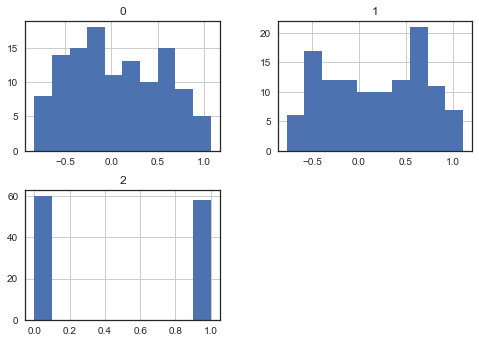

In [140]:
P.hist()
plt.show()

In [233]:
y = np.c_[data2[:,2]]
X = data2[:,0:2]
X.shape

(118, 2)

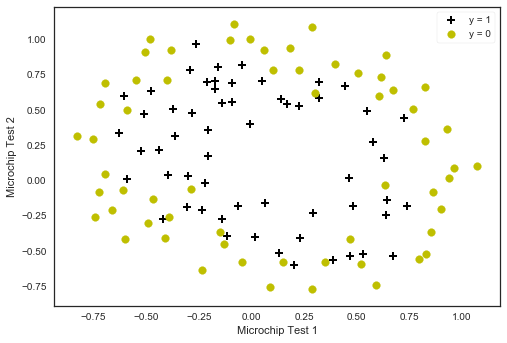

In [142]:
plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

In [214]:
# Note that this function inserts a column with 'ones' in the design matrix for the intercept.
poly = PolynomialFeatures(6)
XX = poly.fit_transform(data2[:,0:2])
print(XX.shape)

(118, 28)


In [215]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

In [216]:
def costFunctionReg(theta, reg, *args):
    m = y.size
    h = sigmoid(XX.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
    
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

In [217]:
def gradientReg(theta, reg, *args):
    m = y.size
    h = sigmoid(XX.dot(theta.reshape(-1,1)))
      
    grad = (1/m)*XX.T.dot(h-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())

In [218]:
def minFunction(theta, Lambda, X, y):
    '''
    Função de minimização
    '''
    
    M = minimize(costFunctionReg, theta, args=(Lambda, XX, y), jac=gradientReg, options={'maxiter':3000})
    print('Custo de Minimização da Função: ', np.round(M.fun, 4))
    print('Custo da Função: ',M.status)
    print('Nº de Iterações necessárias: ',M.nit)
    print('Êxito de Otimização: ',M.message)
    return M

In [219]:
initial_theta = np.zeros(XX.shape[1])
costFunctionReg(initial_theta, 1, XX, y)

0.69314718055994529

In [226]:
initial_theta = np.zeros(XX.shape[1])
g = gradientReg(initial_theta, 1, XX, y)
g.shape

(28,)

In [220]:
t = minFunction(initial_theta, 1, XX, y)

Custo de Minimização da Função:  0.529
Custo da Função:  0
Nº de Iterações necessárias:  47
Êxito de Otimização:  Optimization terminated successfully.



Resultado de Minização na Iteração de LAMBDA = 0
Custo de Minimização da Função:  0.2246
Custo da Função:  0
Nº de Iterações necessárias:  546
Êxito de Otimização:  Optimization terminated successfully.

Resultado de Minização na Iteração de LAMBDA = 1
Custo de Minimização da Função:  0.529
Custo da Função:  0
Nº de Iterações necessárias:  47
Êxito de Otimização:  Optimization terminated successfully.

Resultado de Minização na Iteração de LAMBDA = 100
Custo de Minimização da Função:  0.6865
Custo da Função:  0
Nº de Iterações necessárias:  7
Êxito de Otimização:  Optimization terminated successfully.


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


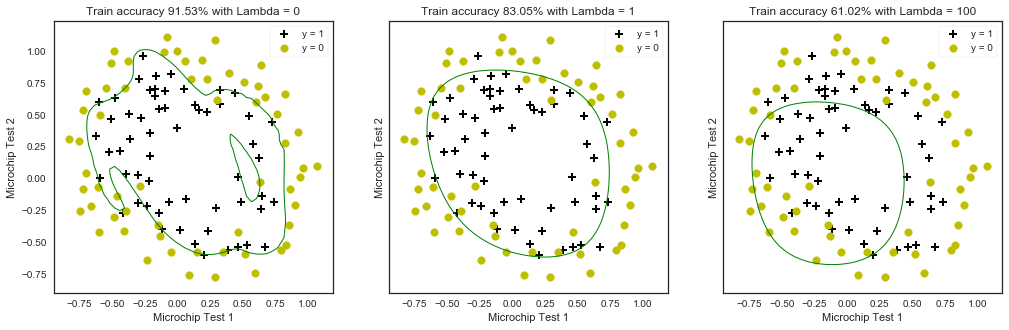

In [221]:
fig, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))

# Decision boundaries
# Lambda = 0 : No regularization --> too flexible, overfitting the training data
# Lambda = 1 : Looks about right
# Lambda = 100 : Too much regularization --> high bias

for i, C in enumerate([0, 1, 100]):
    # Optimize costFunctionReg
    #res2 = minimize(costFunctionReg, initial_theta, args=(C, XX, y), method=None, jac=gradientReg, options={'maxiter':3000})
    print('\n=================================================================================')
    print('Resultado de Minização na Iteração de LAMBDA =', C)
    print('=================================================================================')
    res2 = minFunction(initial_theta, C, XX, y)
    
    # Accuracy
    accuracy = 100*sum(predict(res2.x, XX) == y.ravel())/y.size    

    # Scatter plot of X,y
    plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', axes.flatten()[i])
    
    # Plot decisionboundary
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res2.x))
    h = h.reshape(xx1.shape)
    axes.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       
    axes.flatten()[i].set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), C))

In [237]:
X1.shape

(50, 50)

In [236]:
X0.shape #

(50, 50)


Resultado de Minização com LAMBDA = 1
Custo de Minimização da Função:  0.529
Custo da Função:  0
Nº de Iterações necessárias:  47
Êxito de Otimização:  Optimization terminated successfully.


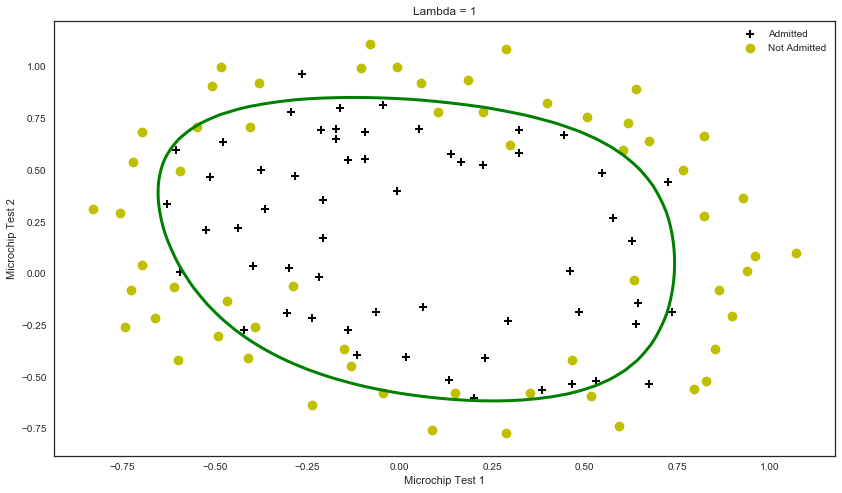

In [238]:
print('\n=================================================================================')
print('Resultado de Minização com LAMBDA =', 1)
print('=================================================================================')

FMIN = minFunction(initial_theta, 1, XX, y)
ACURACIA = np.round(100*sum(predict(FMIN.x, XX) == y.ravel())/y.size, 2)  
LAMBDA=1

# Plot decisionboundary
X0_min, X0_max = X[:,0].min(), X[:,0].max()
X1_min, X1_max = X[:,1].min(), X[:,1].max()
X0, X1 = np.meshgrid(np.linspace(X0_min, X0_max), np.linspace(X1_min, X1_max))
h = sigmoid(poly.fit_transform(np.c_[X0.ravel(), X1.ravel()]).dot(FMIN.x))
h = h.reshape(X0.shape)

# Scatter plot of X,y and Get indexes for class 0 and class 1
neg = data2[:,2] == 0
pos = data2[:,2] == 1

# If no specific axes object has been passed, get the current axes
plt.figure(figsize=(14,8))
plt.contour(X0, X1, h, [0.5], linewidths=3, colors='g', s=60, label='Decision boundary'); 
plt.scatter(data2[pos][:,0], data2[pos][:,1], marker='+', c='k', s=60, linewidth=2, label='Admitted')
plt.scatter(data2[neg][:,0], data2[neg][:,1], marker='o', c='y', s=60, linewidth=2, label='Not Admitted')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')      
plt.title('Lambda = '+str(LAMBDA))
plt.legend(loc=1);

In [228]:
FMIN.x

array([ 1.27268739,  0.62557016,  1.1809665 , -2.01919822, -0.91761468,
       -1.43194199,  0.12375921, -0.36513086, -0.35703388, -0.17485805,
       -1.45843772, -0.05129676, -0.61603963, -0.2746414 , -1.19282569,
       -0.24270336, -0.20570022, -0.04499768, -0.27782709, -0.29525851,
       -0.45613294, -1.04377851,  0.02762813, -0.29265642,  0.01543393,
       -0.32759318, -0.14389199, -0.92460119])